In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
database_path="/Users/dcaliskan/Desktop/surfs_up/hawaii.sqlite"
engine=create_engine(f"sqlite:///{database_path}")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
# 3. Convert the June temperatures to a list.
june_temp = session.query(Measurement.tobs).filter(extract('month',Measurement.date)==6).all()                        
type(june_temp)

list

In [5]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['June Temps'])

In [6]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [7]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 7. Convert the December temperatures to a list.
december_temp = session.query(Measurement.tobs).filter(extract('month',Measurement.date)==12).all()                        
type(december_temp)

list

In [8]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
december_temp_df = pd.DataFrame(december_temp, columns=['December Temps'])
print(december_temp_df)

      December Temps
0               76.0
1               74.0
2               74.0
3               64.0
4               64.0
...              ...
1512            71.0
1513            71.0
1514            69.0
1515            65.0
1516            65.0

[1517 rows x 1 columns]


In [9]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
december_temp_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


### Summary statistics of precipitation in June


In [10]:
june_prcp = session.query(Measurement.prcp ).filter(extract('month',Measurement.date)==6).all()
june_prcp_df = pd.DataFrame(june_prcp, columns=['June Precipitation'])
june_prcp_df.describe()

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


### Summary statistics of precipitation in December

In [11]:
december_prcp = session.query(Measurement.prcp ).filter(extract('month',Measurement.date)==12).all()
december_prcp_df = pd.DataFrame(december_prcp, columns=['Dec Precipitation'])
december_prcp_df.describe()

,Dec Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


### The Multiple Box Plot of Temperature in June and December

In [18]:
import matplotlib.pyplot as plt

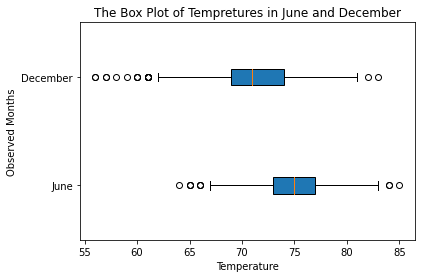

In [21]:
all_data = [june_temp_df["June Temps"],december_temp_df['December Temps']]
labels = ['June', 'December']
plt.boxplot(all_data, vert=False, patch_artist=True, labels=labels)
plt.xlabel('Temperature')
plt.ylabel('Observed Months')
plt.title('The Box Plot of Tempretures in June and December') 
plt.show()